In [61]:
import cv2 as cv #melakukan import library cv2 sebagai cv
import matplotlib.pyplot as plt #melakukan import library matplotlib.pyplot sebagai plt
import numpy as np #melakukan import library numpy sebagai np

In [62]:
#mendefinisikan fungsi imgImport yang berfungsi untuk meng-convert citra dari mode warna BGR ke RGB
def imgImport(citra):
    img = cv.imread(citra) #memasukkan citra dari parameter ke variabel img
    rgbImg = cv.cvtColor(img, cv.COLOR_BGR2RGB) #meng-convert citra pada img
    return rgbImg #mengembalikan hasil convert citra kepada fungsi

In [63]:
#mendefinisikan dataset yang akan digunakan proses morfologi
datasets = np.array(["BASOPHIL.png", 
                    "EOSINOPHIL.png", 
                    "LYMPHOCYTE.png", 
                    "MONOCYTE.png", 
                    "NEUTROPHIL.png"])

datasetsAwal = np.array(["BASOPHIL_resized.png",
                        "EOSINOPHIL_resized.png", 
                        "LYMPHOCYTE_resized.png", 
                        "MONOCYTE_resized.png", 
                        "NEUTROPHIL_resized.png"])

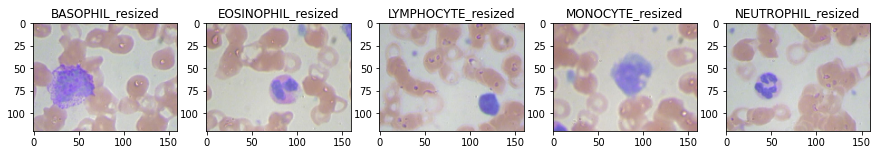

In [64]:
#mendefiniskan fungsi untuk menampilkan dataset awal sebelum diubah ke dalam grayscale dan dilakukan operasi morfologi citra
def showAwal(data):
    plt.figure(figsize=(15,15))
    #perulangan untuk menelusuri semua elemen pada array dan menampilkannya satu persatu setelah di konversi ke mode warna RGB
    for i in range(len(data)):
        plt.subplot(1,len(data),i+1)
        plt.title(data[i][:-4])
        plt.imshow(imgImport(data[i]))
#memanggil fungsi showAwal untuk menapilkan seluruh elemen array dataset pada variabel datasetsAwal
showAwal(datasetsAwal)


In [65]:
#mendefinisikan fungsi untuk menampilkan hasil dari array datasets 
def showResult(data):
    plt.figure(figsize=(15,15))
    #perulangan untuk menelusuri semua elemen pada array dan menampilkannya satu persatu
    for i in range(len(data)):
        plt.subplot(1,len(data),i+1)
        plt.imshow(data[i], cmap='gray')

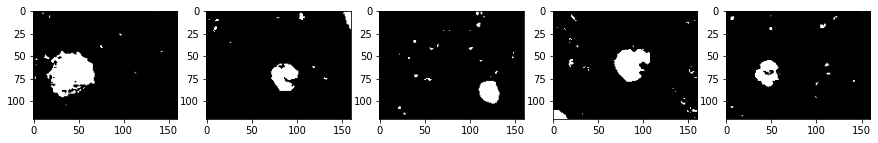

In [66]:
#mendefinisikan fungsi convert untuk mengubah dataset citra yang akan digunakan menjadi grayscale sebelum dilakukan operasi morfologi
def convert(citra):
    img = imgImport(citra)
    grayImg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #melakukan thresholding pada citra untuk memisahkan antar objek pada citra dan backgroundnya
    ret, thresh = cv.threshold(grayImg,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    thresh = 255-thresh
    #citra yang telah di convert dan threshold akan dikembalikan ke fungsi
    return thresh

#memanggil fungsi convert dan memasukkan citra pada datasets[0] untuk di proses dan memasukkannya ke variabel ba
ba = convert(datasets[0])
#memanggil fungsi convert dan memasukkan citra pada datasets[1] untuk di proses dan memasukkannya ke variabel eo
eo = convert(datasets[1])
#memanggil fungsi convert dan memasukkan citra pada datasets[2] untuk di proses dan memasukkannya ke variabel ly
ly = convert(datasets[2])
#memanggil fungsi convert dan memasukkan citra pada datasets[3] untuk di proses dan memasukkannya ke variabel mo
mo = convert(datasets[3])
#memanggil fungsi convert dan memasukkan citra pada datasets[4] untuk di proses dan memasukkannya ke variabel ne
ne = convert(datasets[4])

#memanggil fungsi showResult untuk menampilkan setiap citra setelah dilakukan konversi dan thresholding
showResult([ba, eo, ly, mo, ne])

In [67]:
#mendefinisikan kernel ellipse
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7))
kernel

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [68]:
#mendefinisikan fungsi untuk melakukan operasi morfologi dasar (dilasi dan erosi)
def Morfdasar(img, kernel, pil):
    row, col = img.shape 
    padding = len(kernel)//2 
    image_dil = np.pad(np.zeros(img.shape), padding) 
    nol = (kernel == 0).sum() 
    img_ero = np.pad(img, padding) 
    image_ero = np.zeros(img.shape) 
    
    #operasi morfologi dasar yang dilakukan tergantung dengan parameter pil yang dimasukkan, 1 untuk melakukan dilasi 
    if pil == 1:
        for i in range(row):
            for j in range(col):
                if img[i][j] == 255: 
                    image_dil[i:i+len(kernel), j:j+len(kernel)] += kernel 
        image_dil[image_dil>0] = 255 
        return image_dil[padding:row, padding:col]
    #jika pil tidak 1 maka lakukan operasi erosi
    else:
        for i in range(row):
            for j in range(col):
                if img_ero[i+padding][j+padding] == 255: 
                    jum_nol = ((img_ero[i:i+len(kernel), j:j+len(kernel)]*kernel) == 0).sum() 
                    if nol == jum_nol: 
                        image_ero[i][j] = 255 
        return image_ero

In [69]:
# Membuat fungsi operasi Morfologi gabungan dimana operasi yang dilakukan tergantung pada variabel pil pada parameter
def gabungan(img, pil):
    #citra dilakukan operasi dilasi
    dil = Morfdasar(img, kernel, 1)
    #citra dilakukan operasi erosi
    ero = Morfdasar(img, kernel, 2)
    #jika pil = 1 maka citra yang telah dilakukan erosi akan dilanjutkan dengan dilasi agar menjadi operasi opening
    if pil == 1:
        opening = Morfdasar(ero , kernel, 1)
        return opening
    #jika pil tidak 1 maka citra yang telah dilakukan dilasi akan dilanjutkan dengan erosi agar menjadi operasi closing
    else:
        closing = Morfdasar(dil , kernel, 2)
        return closing

# DILASI

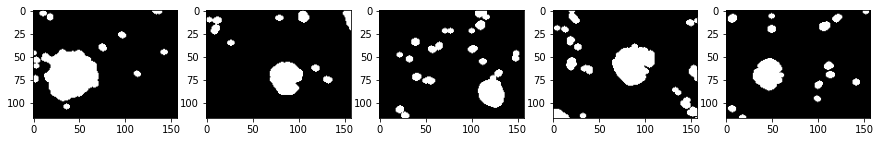

In [70]:
#menampilkan citra hasil dilasi
showResult([Morfdasar(ba, kernel, 1), Morfdasar(eo, kernel, 1), Morfdasar(ly, kernel, 1), Morfdasar(mo, kernel, 1), Morfdasar(ne, kernel, 1)])

# EROSI

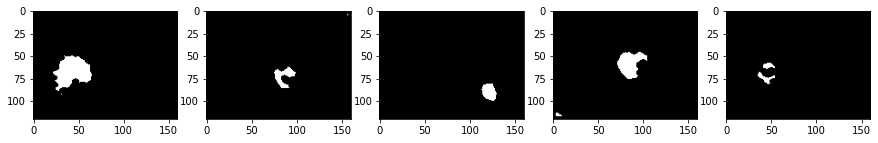

In [71]:
#menampilkan citra hasil erosi
showResult([Morfdasar(ba, kernel, 2), Morfdasar(eo, kernel, 2), Morfdasar(ly, kernel, 2), Morfdasar(mo, kernel, 2), Morfdasar(ne, kernel, 2)])

# OPENING

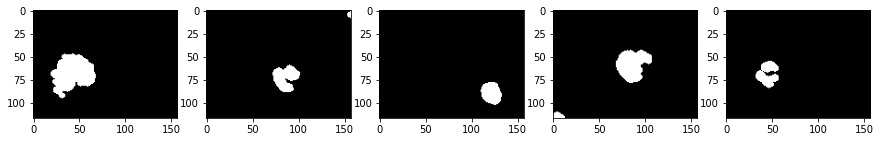

In [72]:
#menampilkan citra hasil opening
showResult([gabungan(ba, 1), gabungan(eo, 1), gabungan(ly, 1), gabungan(mo, 1), gabungan(ne, 1)])

# CLOSING

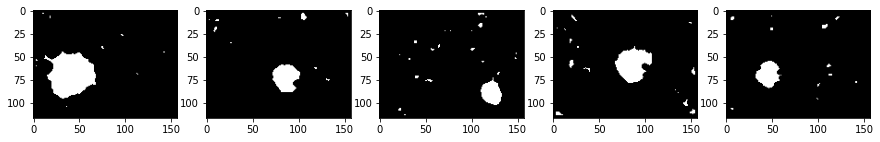

In [73]:
#menampilkan citra hasil closing
showResult([gabungan(ba, 2), gabungan(eo, 2), gabungan(ly, 2), gabungan(mo, 2), gabungan(ne, 2)])